<a href="https://colab.research.google.com/github/itsalanthomas/shipping-optimization/blob/dev/notebooks/E_Commerce_Optimization_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# load libraries
from google.colab import files
from io import StringIO
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load data in with file simulation
uploaded = files.upload()
filename = 'ecommerce_shipping.csv'

with open(filename, 'r') as file:
  csv_text = file.read()

# create df
df = pd.read_csv(StringIO(csv_text))
df


Saving ecommerce_shipping.csv to ecommerce_shipping.csv


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [3]:
## EDA - Exploratory Data Analysis ##
df.info()
df.describe()
df.isnull().sum() #check count of null values in columns
df[df.isnull().any(axis = 1)] #check if there are any missing values in rows

# rename columns
df.columns = [col.strip().replace('_', ' ').title() for col in df.columns]
df.rename(columns={'Reached.On.Time Y.N': 'On-Time Delivery'},inplace=True)

# new features engineered
df['Net Price'] = round(df['Cost Of The Product'] - df['Discount Offered'],2) # net price
df['Discount Ratio'] = round((df['Discount Offered']/df['Cost Of The Product']), 2) # % of product cost discounted

# late rate grouped by mode of shipment
late_rate_lookup = (
    df.groupby('Mode Of Shipment')['On-Time Delivery']
    .mean() # 1 - not on time , 0 - on time
    .to_dict()
)
df['Status By Mode Of Shipment'] = round(df['Mode Of Shipment'].map(late_rate_lookup),2)
df[['Discount Ratio','Net Price','Cost Of The Product','Discount Offered', 'Status By Mode Of Shipment']].head(5)

# customize logic for label encoding feature
product_order = {'low': 0 ,'medium':1, 'high':2}
df['Product Importance'] = df['Product Importance'].map(product_order)

df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


,Id,Warehouse Block,Mode Of Shipment,Customer Care Calls,Customer Rating,Cost Of The Product,Prior Purchases,Product Importance,Gender,Discount Offered,Weight In Gms,On-Time Delivery,Net Price,Discount Ratio,Status By Mode Of Shipment
0,1,D,Flight,4,2,177,3,0,F,44,1233,1,133,0.25,0.6
1,2,F,Flight,4,5,216,2,0,M,59,3088,1,157,0.27,0.6
2,3,A,Flight,2,2,183,4,0,M,48,3374,1,135,0.26,0.6
3,4,B,Flight,3,3,176,4,1,M,10,1177,1,166,0.06,0.6
4,5,C,Flight,2,2,184,3,1,F,46,2484,1,138,0.25,0.6


In [5]:
# save as new cleaned csv
df.to_csv('ecommerce_shipping_cleaned.csv', index=False)
files.download('ecommerce_shipping_cleaned.csv')

df2 = pd.read_csv('ecommerce_shipping_cleaned.csv')
df2.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Id,Warehouse Block,Mode Of Shipment,Customer Care Calls,Customer Rating,Cost Of The Product,Prior Purchases,Product Importance,Gender,Discount Offered,Weight In Gms,On-Time Delivery,Net Price,Discount Ratio,Status By Mode Of Shipment
0,1,D,Flight,4,2,177,3,0,F,44,1233,1,133,0.25,0.6
1,2,F,Flight,4,5,216,2,0,M,59,3088,1,157,0.27,0.6
2,3,A,Flight,2,2,183,4,0,M,48,3374,1,135,0.26,0.6
3,4,B,Flight,3,3,176,4,1,M,10,1177,1,166,0.06,0.6
4,5,C,Flight,2,2,184,3,1,F,46,2484,1,138,0.25,0.6


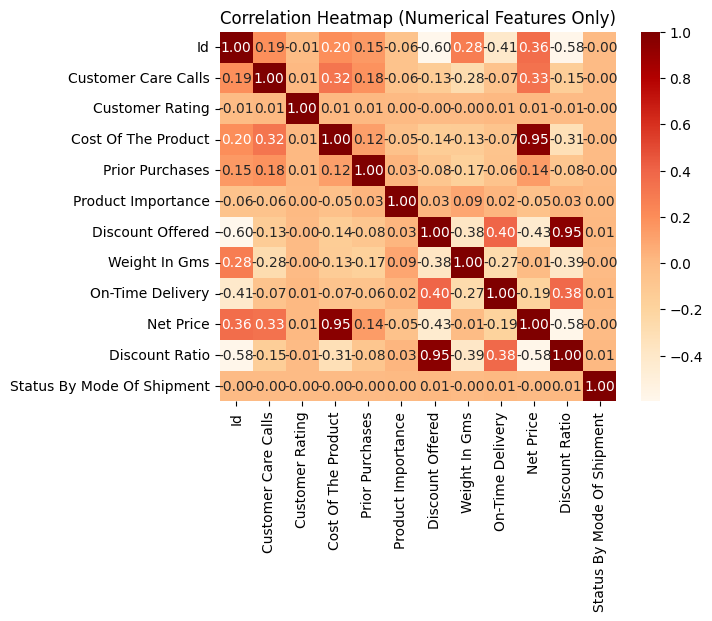

In [12]:
# correlation heatmap of numerical features
corr = df2.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='OrRd')
plt.title('Correlation Heatmap (Numerical Features Only)')
plt.show()

<ipython-input-18-9cb529496acf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df2['Product Importance'], data = df2, palette='Set1')


<Axes: xlabel='Product Importance', ylabel='count'>

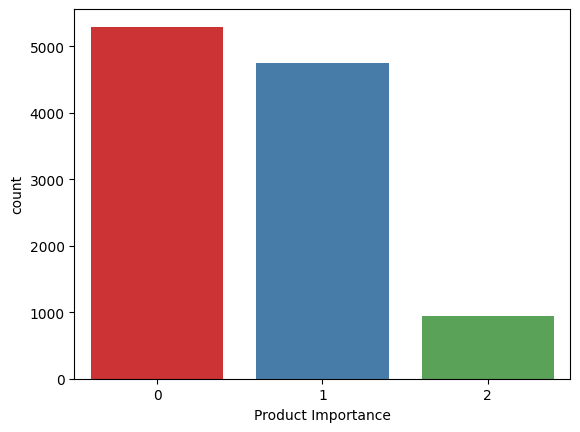

In [18]:
#Count plot for Product Importance
sns.countplot(x = df2['Product Importance'], data = df2, palette='Set1')

Text(0.5, 1.0, 'Weight in grams distribution')

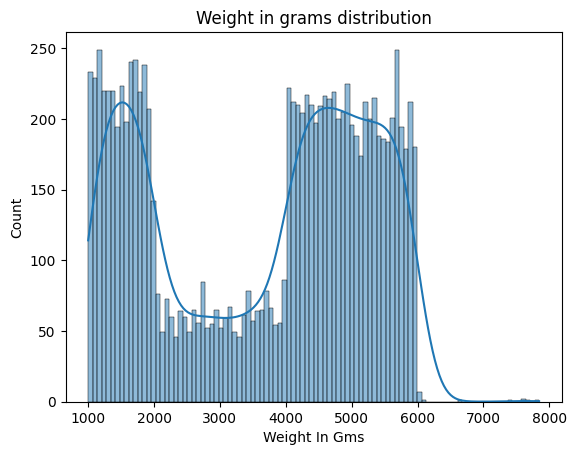

In [15]:
# hist plot for the weight in grams....seems to be a bimodal distribution with some outliers
sns.histplot(df2['Weight In Gms'],bins = 100,kde = True)
plt.title('Weight in grams distribution')

<ipython-input-21-f3b0529695f7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Warehouse Block', y='Weight In Gms', data=df2, palette='Set2')


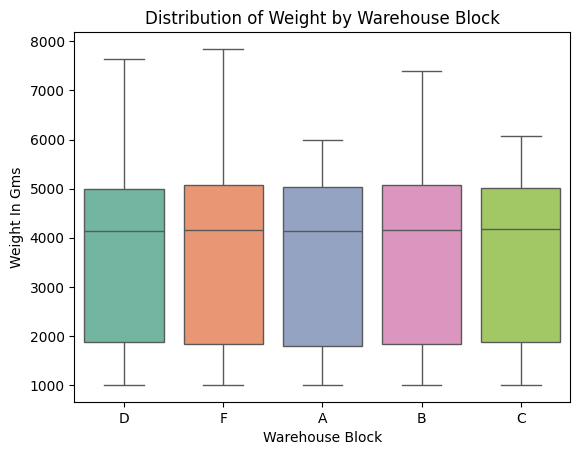

In [21]:
# bit more distribution...Most 50% range is the same for all of them.
sns.boxplot(x='Warehouse Block', y='Weight In Gms', data=df2, palette='Set2')
plt.title('Distribution of Weight by Warehouse Block')
plt.show()

In [19]:
# checking for outliers using the IQR method

q1 = df2['Weight In Gms'].quantile(0.25)
q3 = df2['Weight In Gms'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df2[(df2['Weight In Gms'] < lower_bound) | (df2['Weight In Gms'] > upper_bound)]

print('Number of outliers:', outliers.shape[0])

Number of outliers: 0


<ipython-input-24-94a60e539541>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df2['On-Time Delivery'], data = df2, palette='muted')


Text(0.5, 1.0, 'On-Time Delivery Counts')

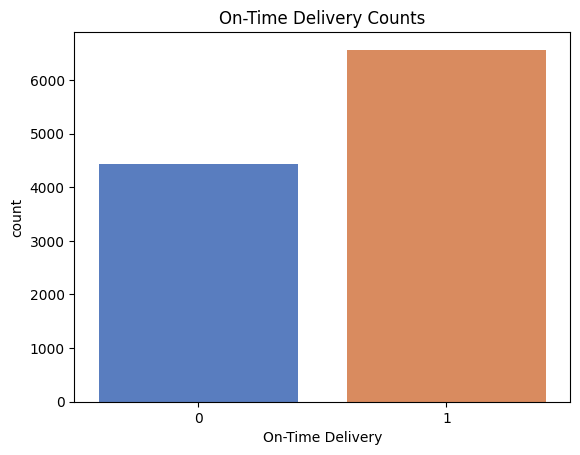

In [24]:
# countplot to delays and On-time deliveries
sns.countplot(x = df2['On-Time Delivery'], data = df2, palette='muted')
plt.title('On-Time Delivery Counts')
# 1 - late , 0 - on-time

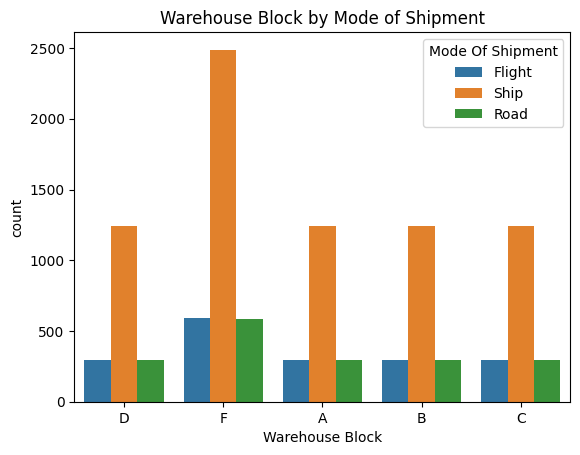

In [25]:
sns.countplot(x='Warehouse Block', hue='Mode Of Shipment', data=df2)
plt.title('Warehouse Block by Mode of Shipment')
plt.show()


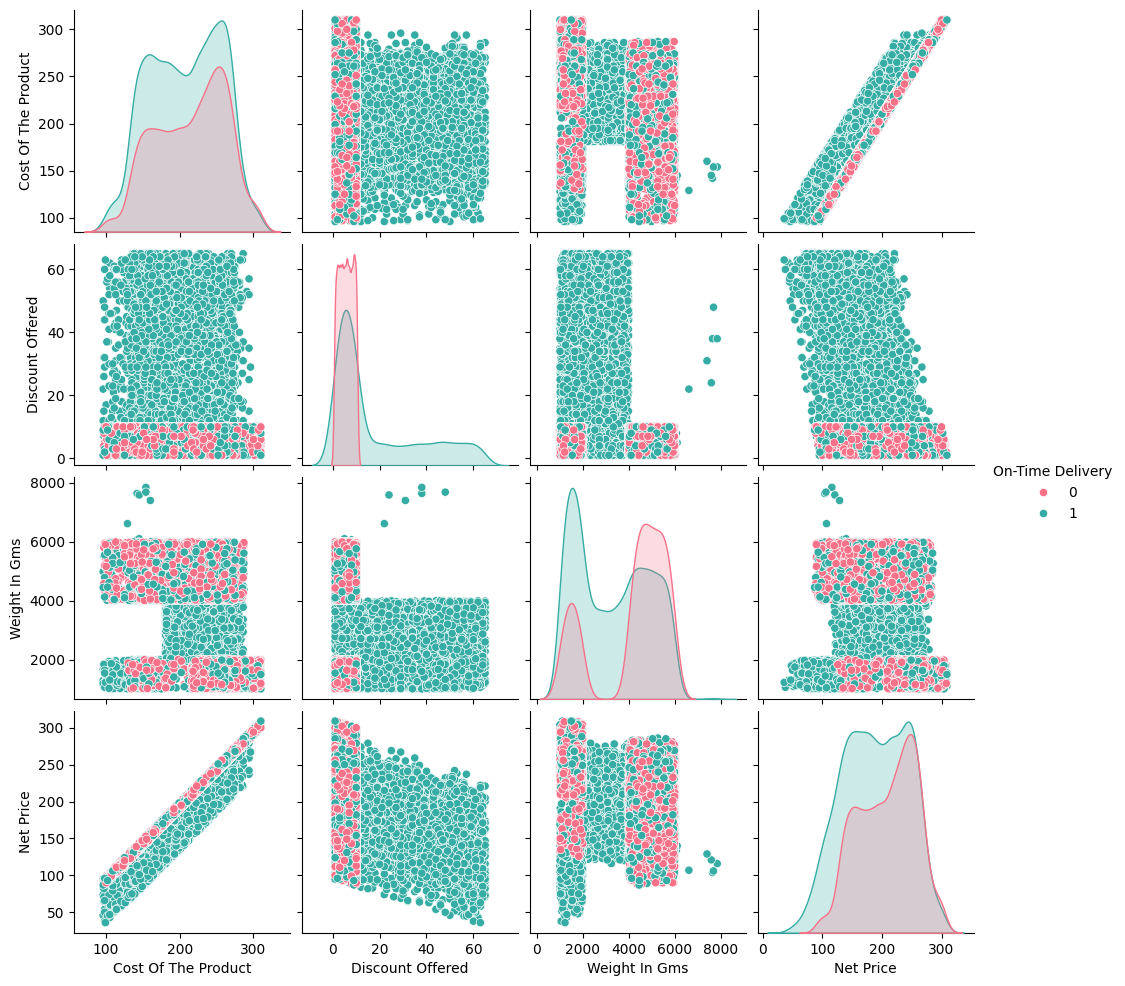

In [27]:
# pairplot to see relationship to delivery status
selected_cols = ['Cost Of The Product', 'Discount Offered', 'Weight In Gms', 'Net Price', 'On-Time Delivery']
sns.pairplot(df2[selected_cols], hue='On-Time Delivery',palette='husl')
plt.show()
